In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings

In [2]:
data = pd.read_csv("datasets/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabets_df = pd.DataFrame(data)

In [4]:
diabets_df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabets_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabets_df.shape

(768, 9)

In [7]:
diabets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabets_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

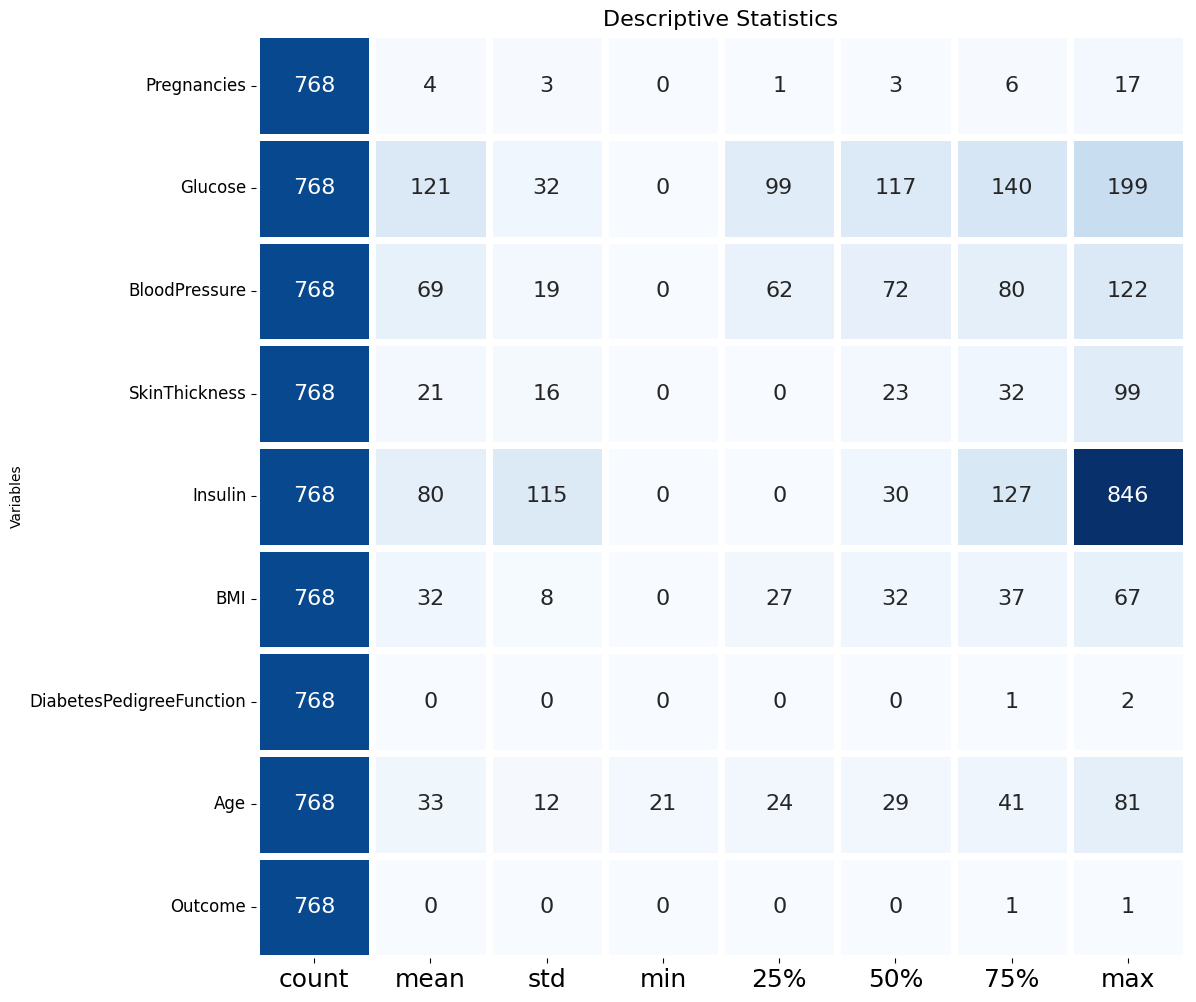

In [9]:
desc = diabets_df.describe().T
diabets_df2 = pd.DataFrame(index=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(diabets_df2, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

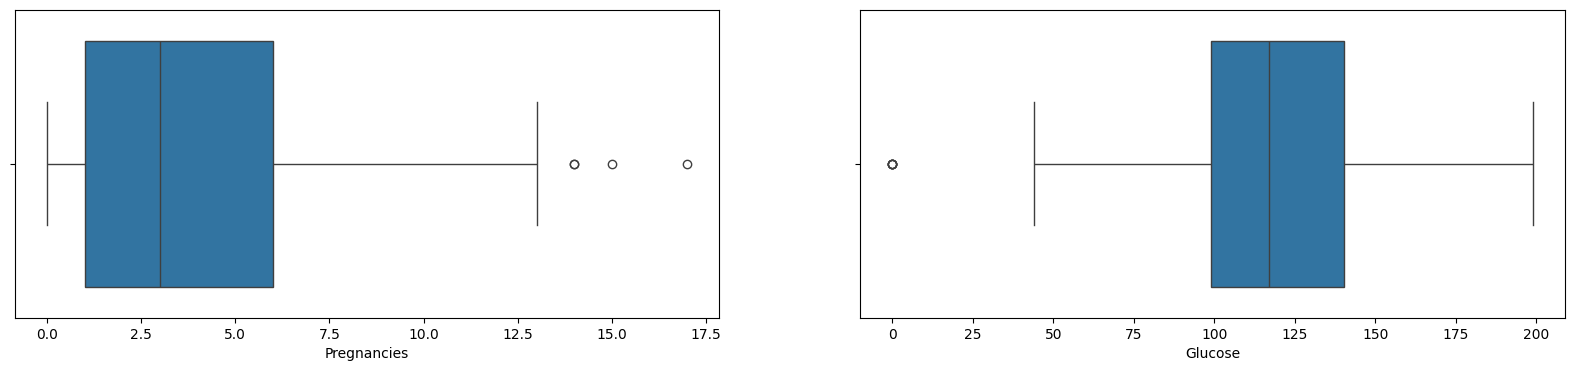

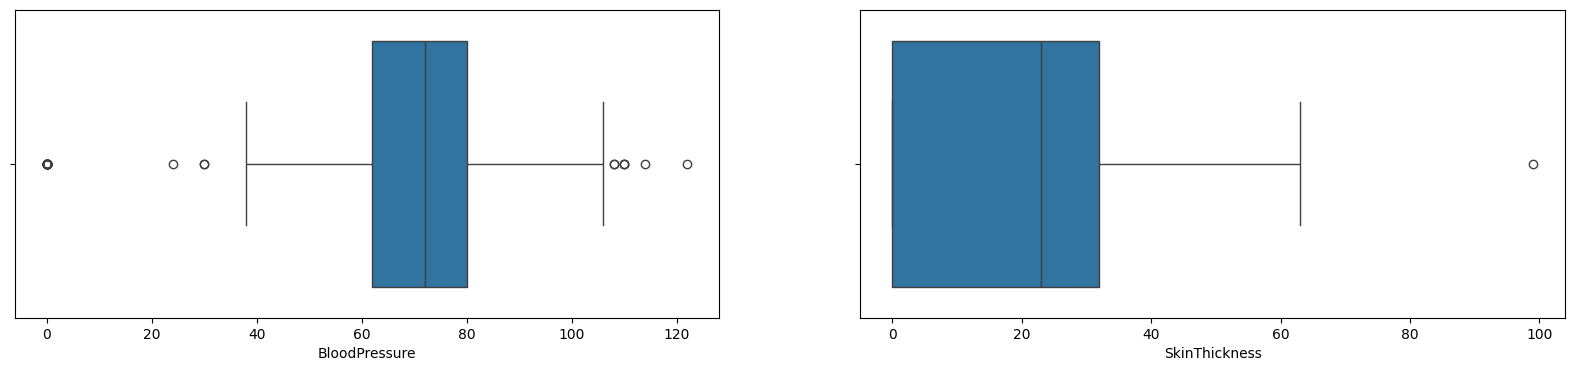

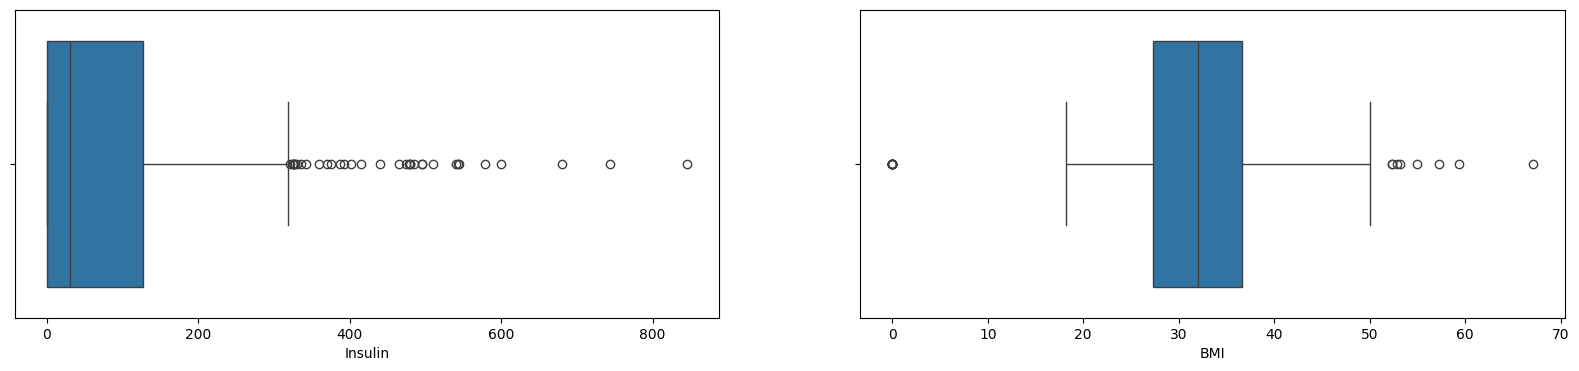

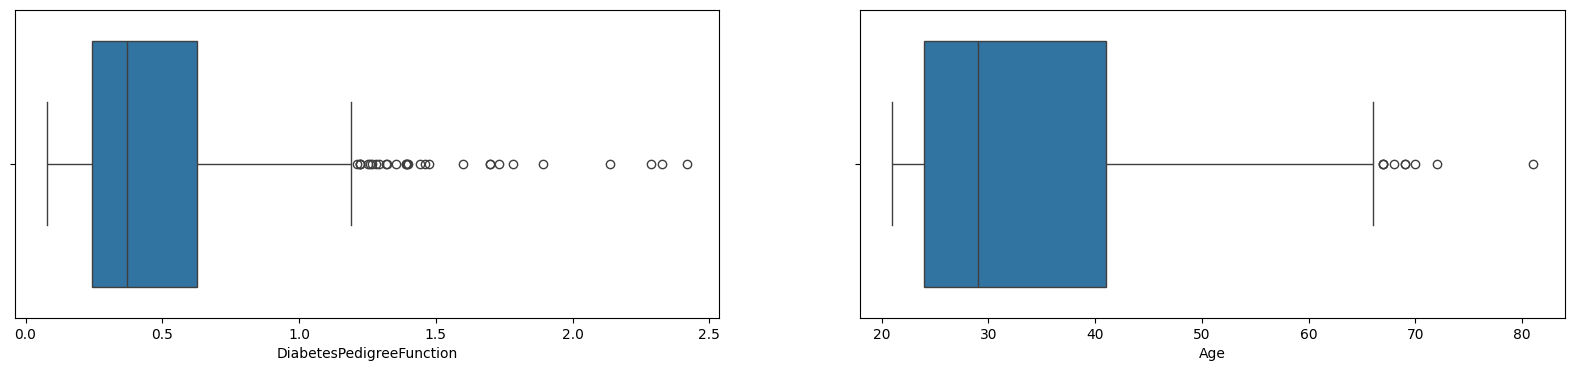

In [10]:
Numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
i = 0
while i <8:
    fig = plt.figure(figsize =[20,4])
    plt.subplot(1,2,1)   #(one row, two plots, firs one)
    sns.boxplot(x =Numerical[i], data = diabets_df )
    i+=1
    if i==8:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x =Numerical[i], data = diabets_df)
    i+=1
  
    plt.show()

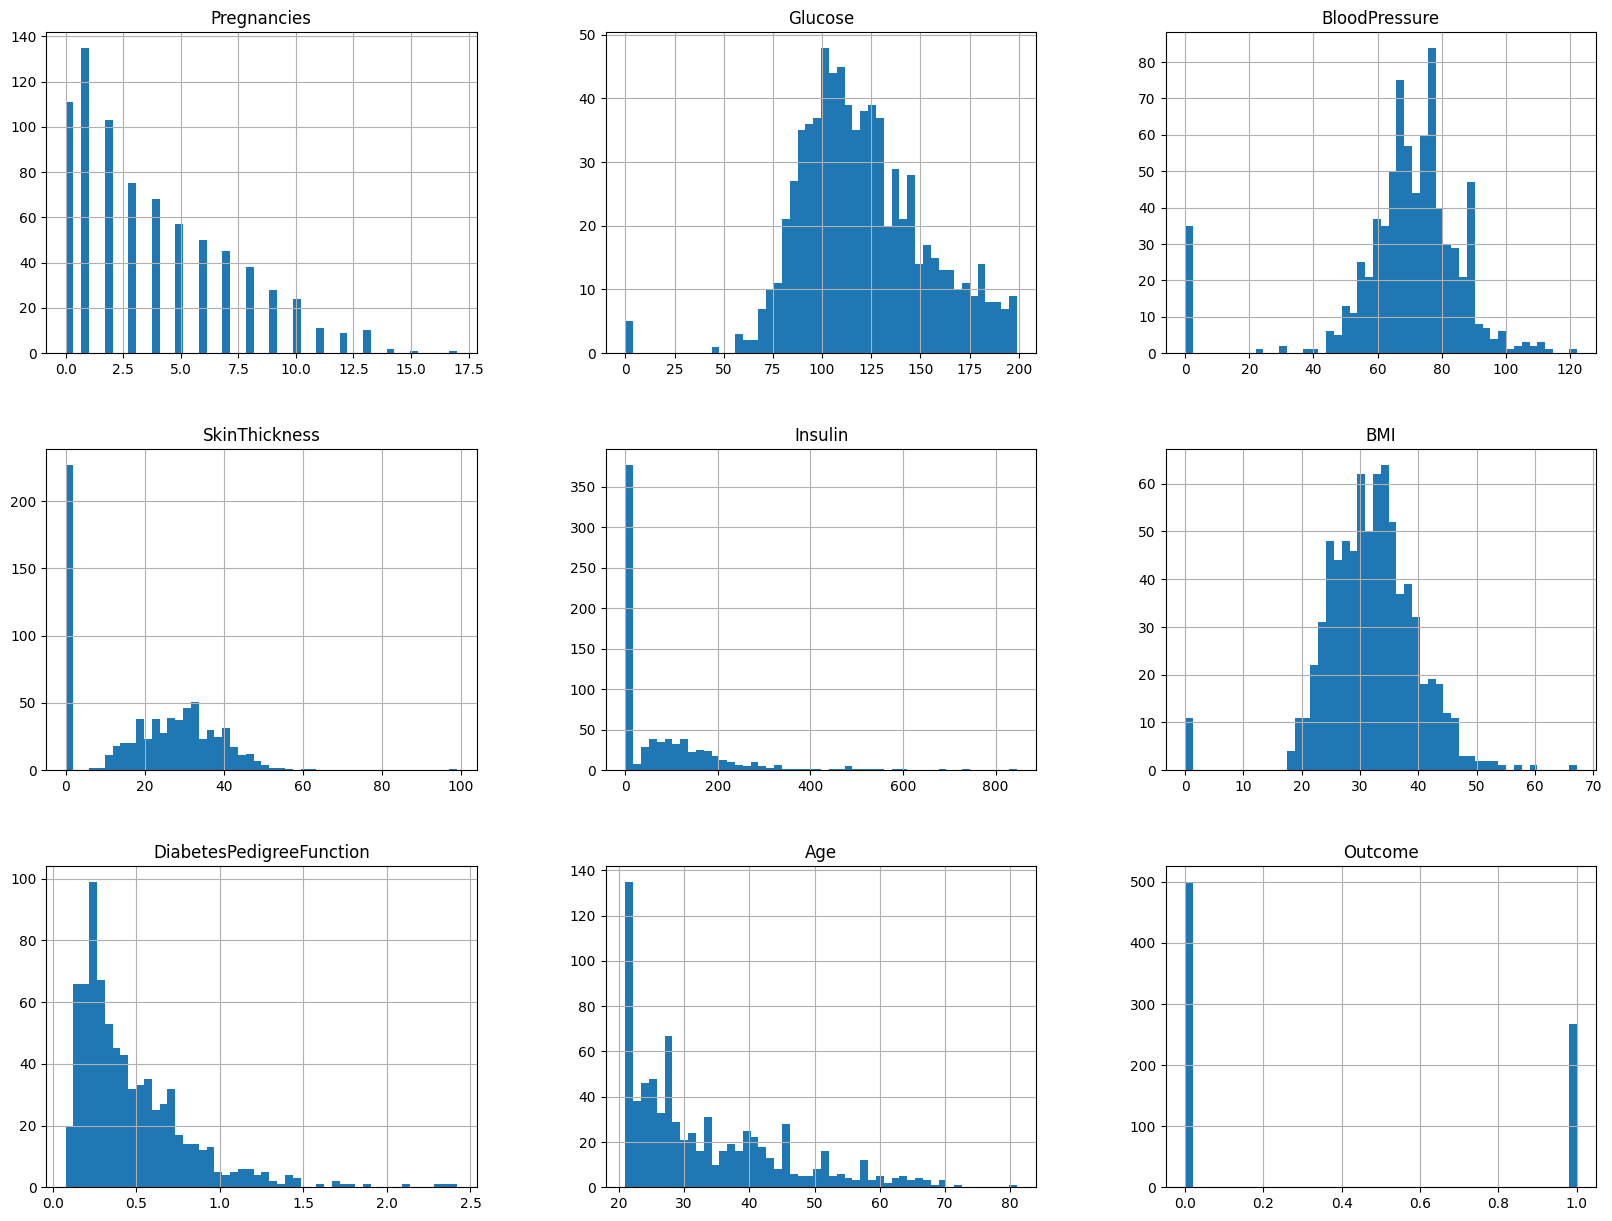

In [11]:
diabets_df.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
diabets_df3 = diabets_df.copy()

zero_col = ['Glucose','Insulin','SkinThickness','BloodPressure','BMI']
diabets_df3[zero_col] = diabets_df3[zero_col].replace(0, np.nan)

In [13]:
for col in ['Glucose','Insulin','SkinThickness']:
    median_col = np.median(diabets_df3[diabets_df3[col].notna()][col])
    diabets_df3[col] = diabets_df3[col].fillna(median_col)
for col in ['BMI','BloodPressure']:
    mean_col = np.mean(diabets_df3[diabets_df3[col].notna()][col])
    diabets_df3[col] = diabets_df3[col].fillna(mean_col)

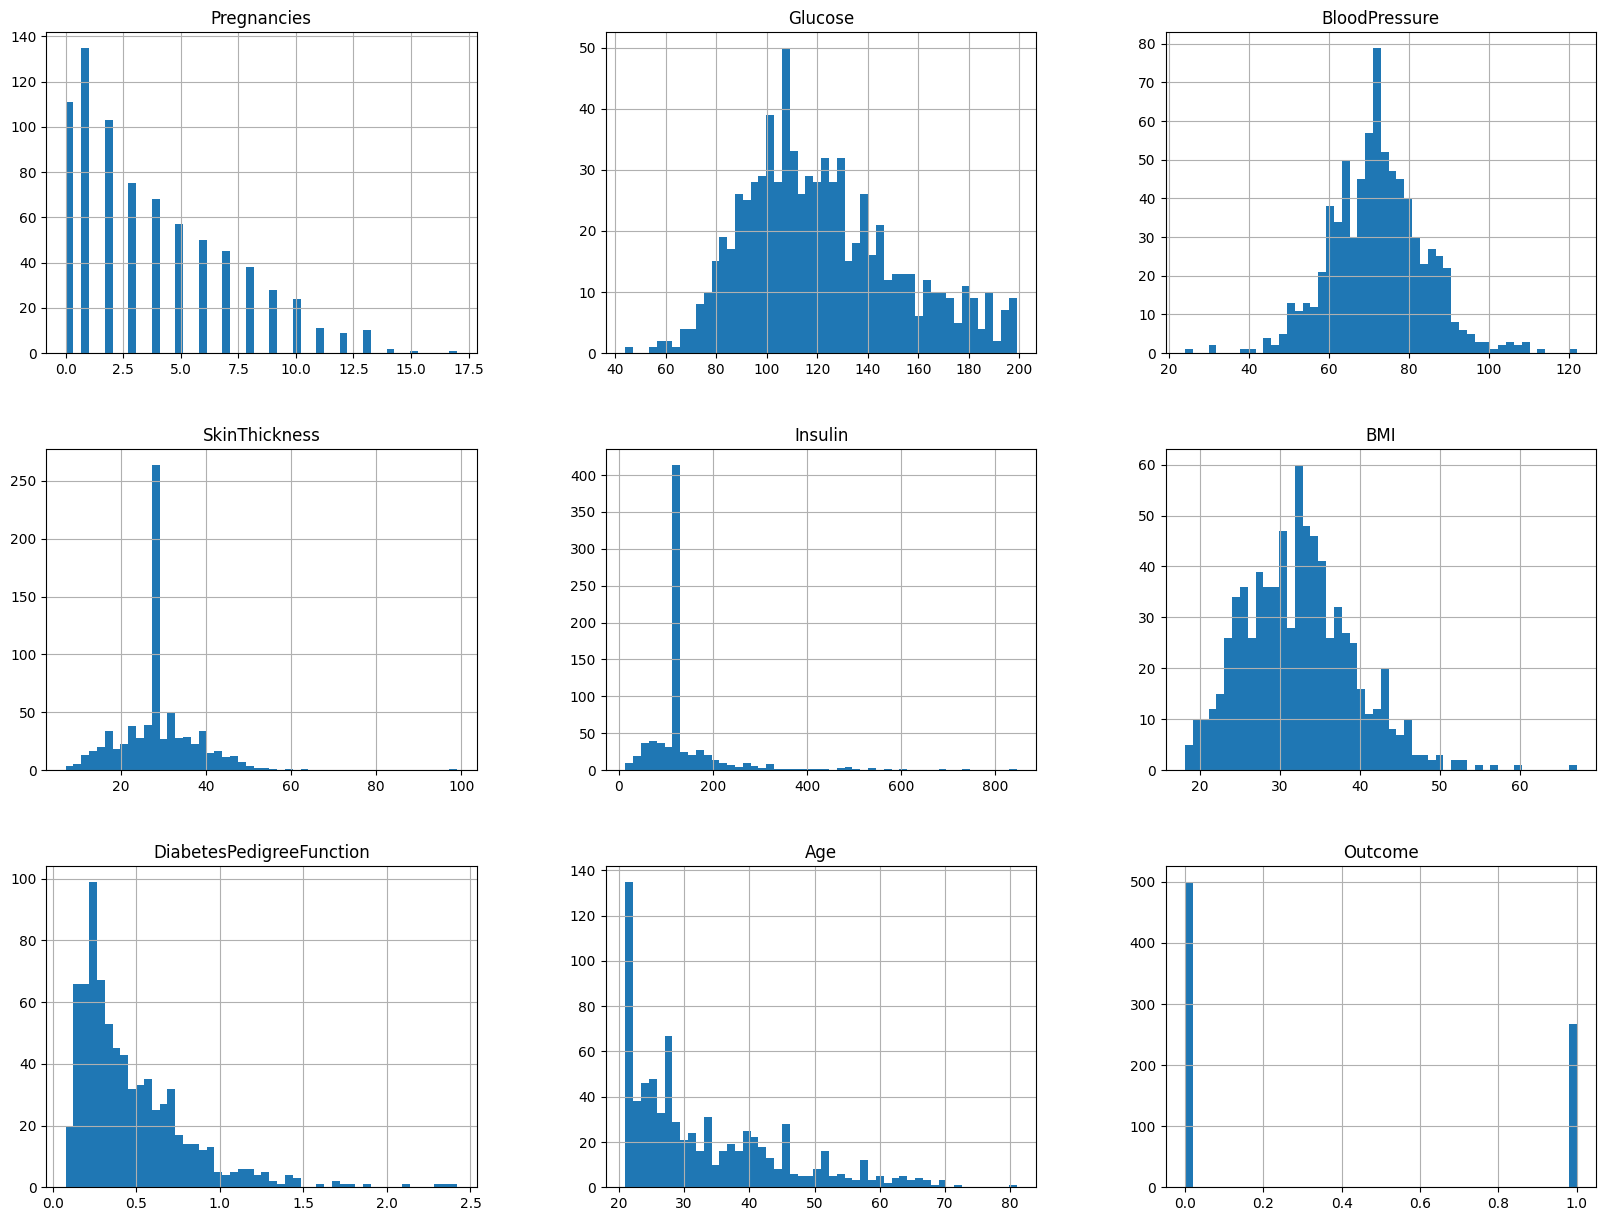

In [14]:
diabets_df3.hist(bins=50,figsize=(20,15))
plt.show()

In [15]:
diabets_df3.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

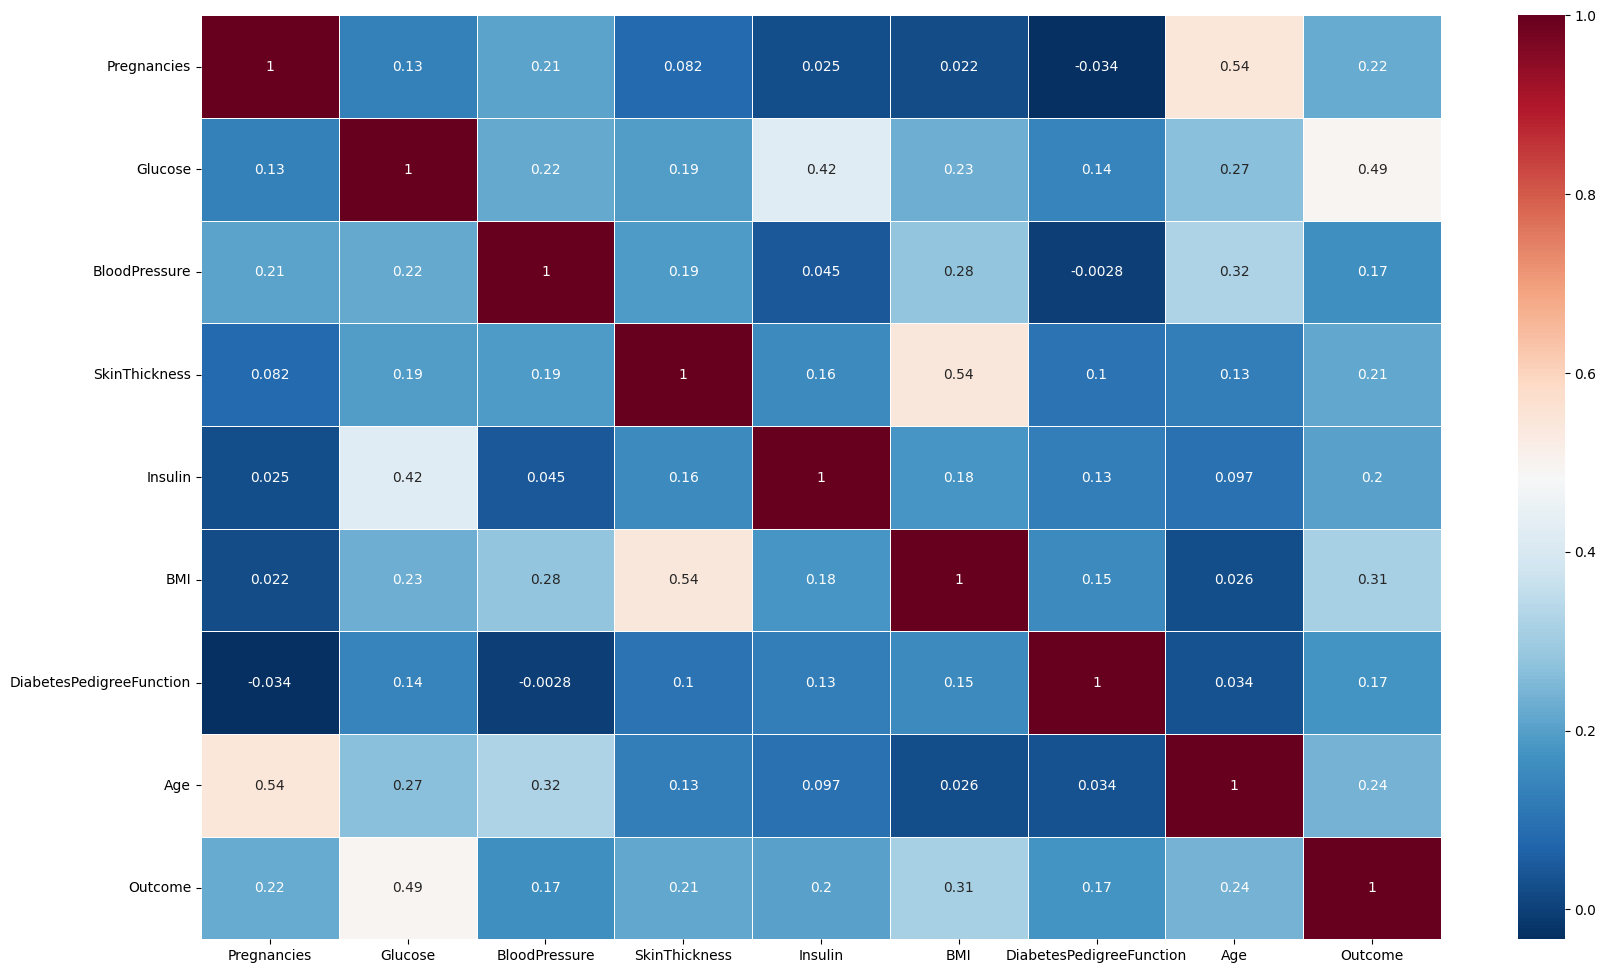

In [16]:
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(diabets_df3.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [17]:
diabets_df3.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208522,0.081770,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218749,0.192615,0.419451,0.230862,0.137327,0.266909,0.492782
BloodPressure,0.208522,0.218749,1.000000,0.191853,0.045087,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192615,0.191853,1.000000,0.155610,0.543162,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045087,0.155610,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230862,0.281268,0.543162,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002763,0.102188,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324595,0.126107,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.166074,0.214873,0.203790,0.311924,0.173844,0.238356,1.000000


In [18]:
diabets_df3.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

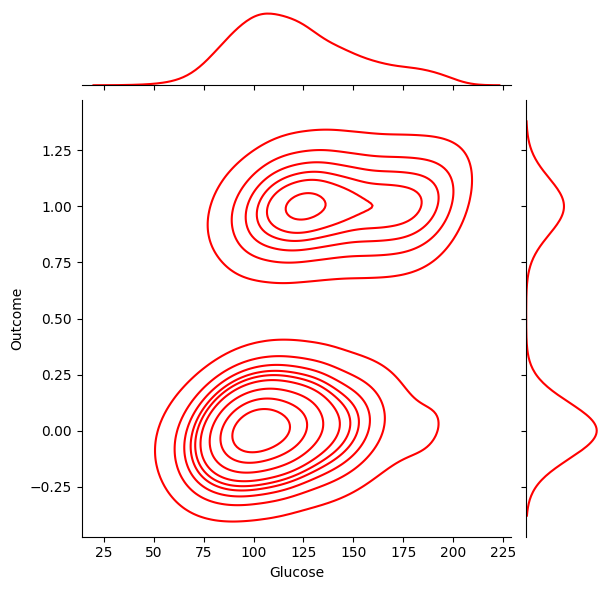

In [19]:
sns.jointplot(x='Glucose',y='Outcome',data=diabets_df3,color='red',kind='kde')

In [20]:
X = pd.DataFrame(diabets_df3 , columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
Y = diabets_df3.Outcome

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state =0)

In [22]:
Logreg = LogisticRegression(solver = "liblinear")

In [23]:
Logreg.fit(X_train , Y_train)
Y_pred = Logreg.predict(X_test)

In [24]:
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [25]:
print("Accuracy:" , metrics.accuracy_score(Y_test,Y_pred ))

Accuracy: 0.7708333333333334


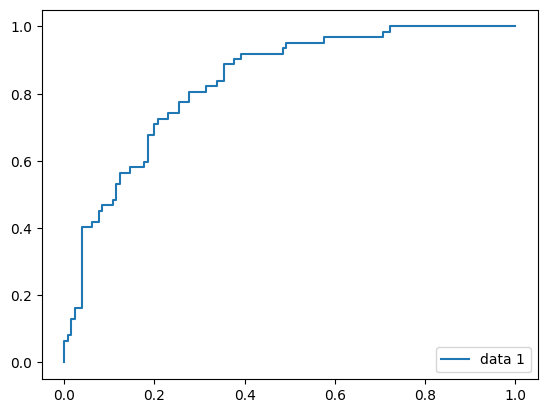

In [26]:
Y_pred_proba = Logreg.predict_proba(X_test)[::,1]
fpr , tpr,_ = metrics.roc_curve(Y_test,Y_pred_proba)
plt.plot(fpr , tpr, label = "data 1")
plt.legend(loc = 4)
plt.show()

In [27]:
Logreg.classes_

array([0, 1])

In [28]:
Logreg.score(X,Y)

0.7669270833333334

In [29]:
confusion_matrix(Y, Logreg.predict(X))

array([[441,  59],
       [120, 148]])

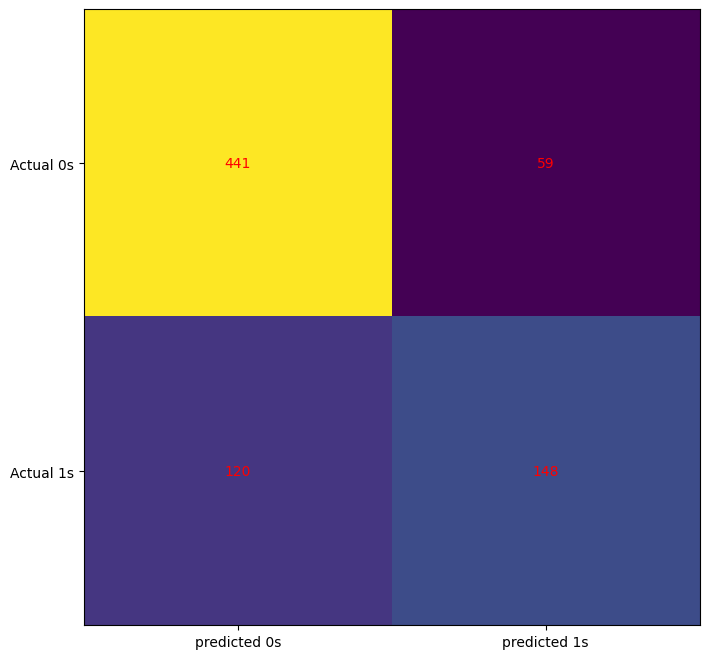

In [30]:
cm = confusion_matrix(Y, Logreg.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")   
plt.show()

In [31]:
print(classification_report(Y, Logreg.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.71      0.55      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768

